In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_seq_items = 1000

In [2]:
x_train = pd.read_csv('train.csv')
x_test = pd.read_csv('test.csv')

y_train = x_train['SalePrice']

x_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
textCol = []

for i in x_train.columns:
    if x_train[i].dtype == 'O':
        print(f'{i}: {x_train[i].nunique()}')
        textCol.append(i)

numCol = [i for i in x_train.columns if i not in textCol]

MSZoning: 5
Street: 2
Alley: 2
LotShape: 4
LandContour: 4
Utilities: 2
LotConfig: 5
LandSlope: 3
Neighborhood: 25
Condition1: 9
Condition2: 8
BldgType: 5
HouseStyle: 8
RoofStyle: 6
RoofMatl: 8
Exterior1st: 15
Exterior2nd: 16
MasVnrType: 4
ExterQual: 4
ExterCond: 5
Foundation: 6
BsmtQual: 4
BsmtCond: 4
BsmtExposure: 4
BsmtFinType1: 6
BsmtFinType2: 6
Heating: 6
HeatingQC: 5
CentralAir: 2
Electrical: 5
KitchenQual: 4
Functional: 7
FireplaceQu: 5
GarageType: 6
GarageFinish: 3
GarageQual: 5
GarageCond: 5
PavedDrive: 3
PoolQC: 3
Fence: 4
MiscFeature: 4
SaleType: 9
SaleCondition: 6


## Imputation & Encoding

In [5]:
print("Null values in each columns:")

for i in x_train.columns:
    if x_train[i].isnull().sum() > 0:
        print(f'{i}: {x_train[i].isnull().sum()}')
        if x_train[i].dtype == 'O':
            x_train[i] = x_train[i].fillna(x_train[i].mode()[0])
        else:
            x_train[i] = x_train[i].fillna(x_train[i].mean())

Null values in each columns:
LotFrontage: 259
Alley: 1369
MasVnrType: 8
MasVnrArea: 8
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinType2: 38
Electrical: 1
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
PoolQC: 1453
Fence: 1179
MiscFeature: 1406


In [6]:
x_train_en = pd.get_dummies(x_train, columns = textCol)
x_test_en = pd.get_dummies(x_test, columns = textCol)
x_train_en.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


## EDA

first, We can apply basic filter using the chi squared test. Chi square test is used to determine wheather that particular feature is relevant in determining the target variable or not. Here we have printed the p values for the null hypothesis that the feaature is not relevant to the targt variable. So, all features with p values greater than 0.05 can be dropped.

In [7]:
chis = chi2(x_train_en,y_train)

chi_dict = {}
p_dict = {}

for i in range(len(x_train_en.columns)):
    chi_dict[x_train_en.columns[i]] = chis[0][i]
    p_dict[x_train_en.columns[i]] = chis[1][i]

sorted_x = sorted(p_dict.items(), key=lambda kv: kv[1])
sorted_x

[('Id', 0.0),
 ('MSSubClass', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('SalePrice', 0.0),
 ('Exterior2nd_Other', 6.169713744213832e-62),
 ('Exterior1st_ImStucc', 6.16971374421665e-62),
 ('Condition2_RRAn', 6.169713744227925e-62),
 ('ExterCond_Po', 6.1697137442335625e-62),
 ('Heating_Floor', 6.1697137442335625e-62),
 ('SaleType_Con', 8.116947781023288e-62),
 ('SaleCondition_Alloca', 2.9531245914428285e-51),
 ('ExterQual_Ex', 2.939941997083686e-30),
 ('FireplaceQu_Ex', 1.417518590376342e-26),
 ('Condition2_PosN', 1.025878050082384e-23),
 ('BsmtCond_Po', 1.0258780500840425e-23),
 ('SaleType_New', 1.2863085392831085e-

In [8]:
chiCol = []
droppedCol = []

for i,j in sorted_x:
    if j < 0.05:
        chiCol.append(i)
    else:
        droppedCol.append(i)

chiCol

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'Exterior2nd_Other',
 'Exterior1st_ImStucc',
 'Condition2_RRAn',
 'ExterCond_Po',
 'Heating_Floor',
 'SaleType_Con',
 'SaleCondition_Alloca',
 'ExterQual_Ex',
 'FireplaceQu_Ex',
 'Condition2_PosN',
 'BsmtCond_Po',
 'SaleType_New',
 'Neighborhood_NridgHt',
 'SaleCondition_Partial',
 'Neighborhood_NoRidge',
 'MSZoning_C (all)',
 'KitchenQual_Ex',
 'BsmtQual_Ex',
 'Neighborhood_Veenker',
 'LotShape_IR3',
 'Heating_Wall',
 'Foundation_Stone',
 'Foundation_Slab',
 'Exterior2nd_CmentBd',
 'Heating_Grav',
 'Exterior1st_CemntBd',
 'Neighborhood_Blmngtn',
 'Street_Grvl',
 'HouseStyle_2.5Fin',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'MSZoning_FV',
 'RoofMatl_WdShngl',
 'Sale

C:\Users\Atharva\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:227: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


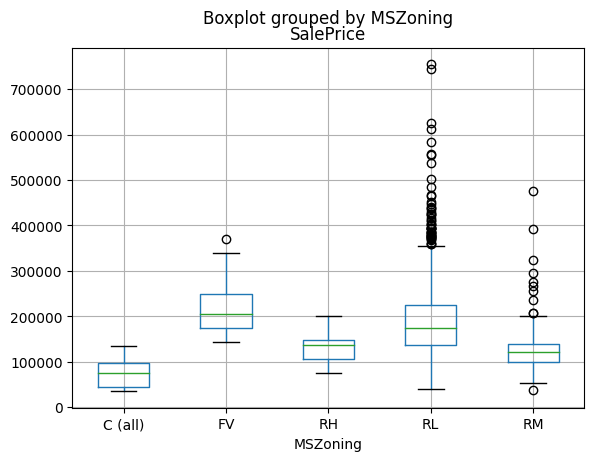

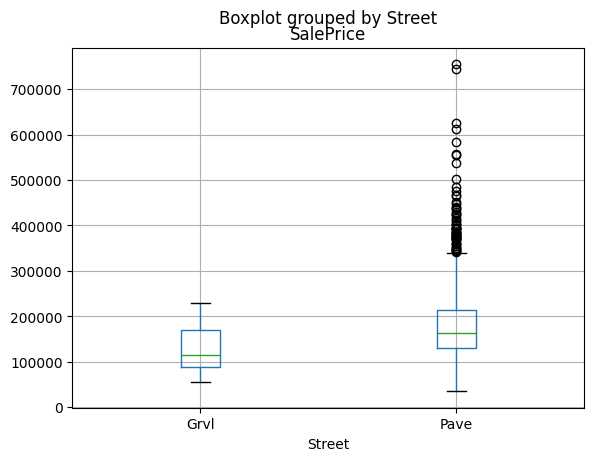

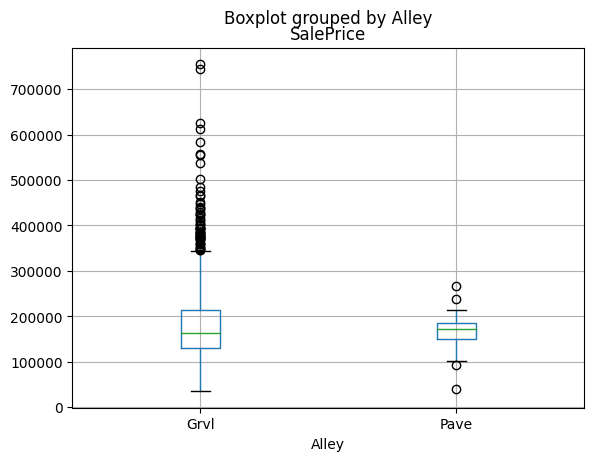

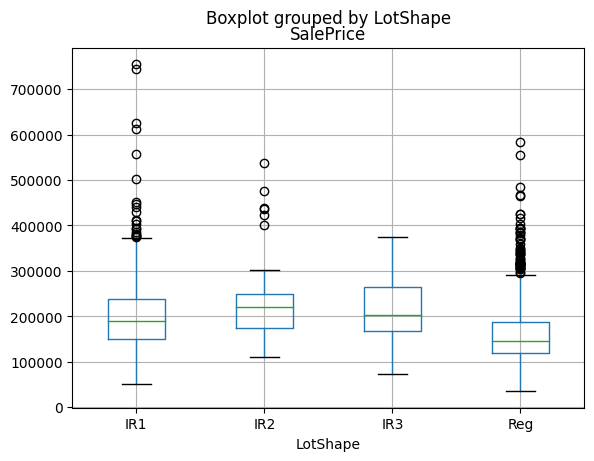

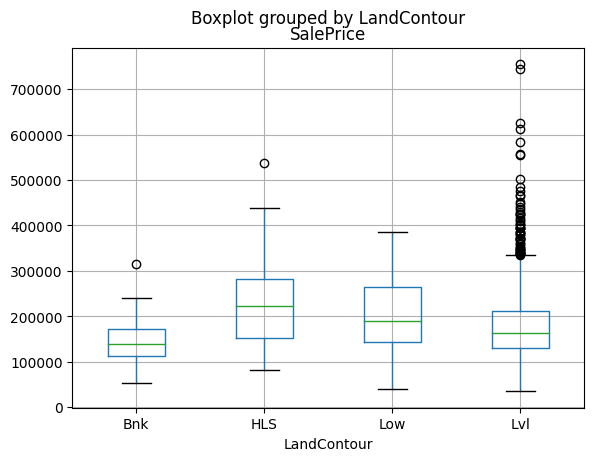

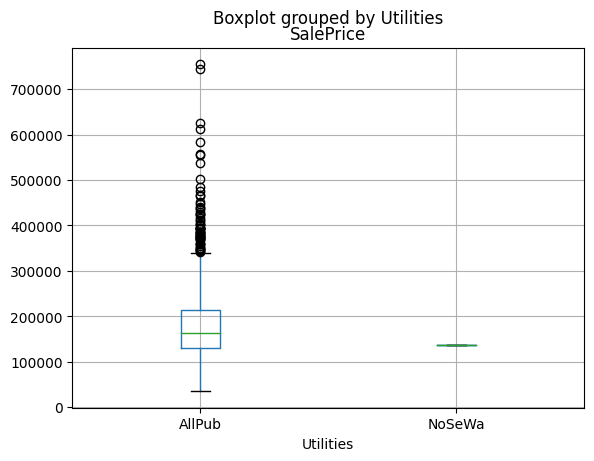

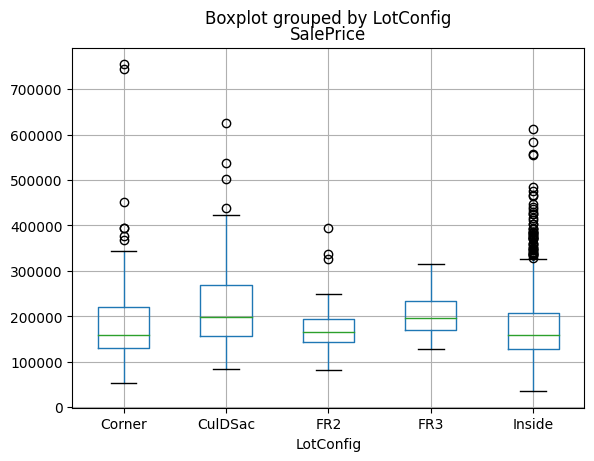

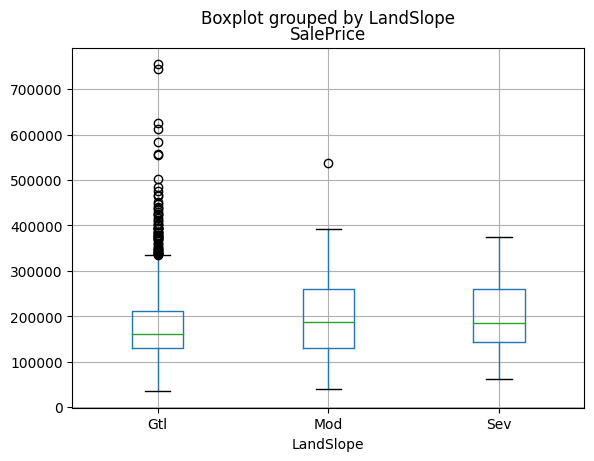

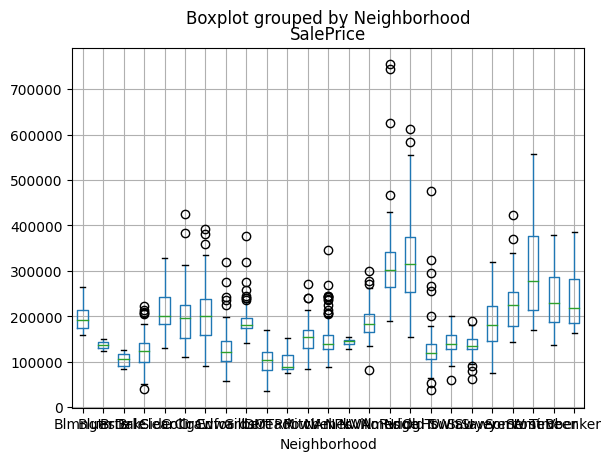

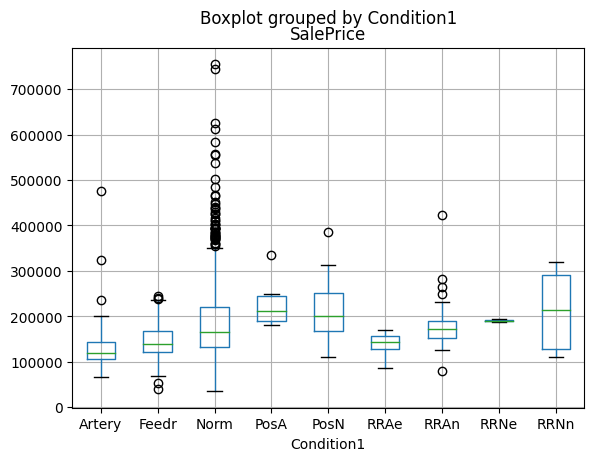

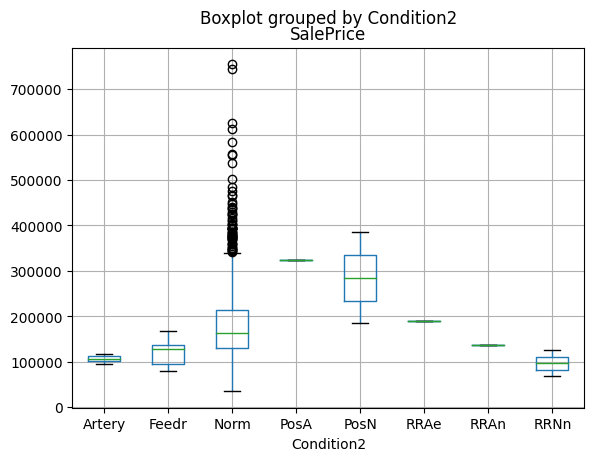

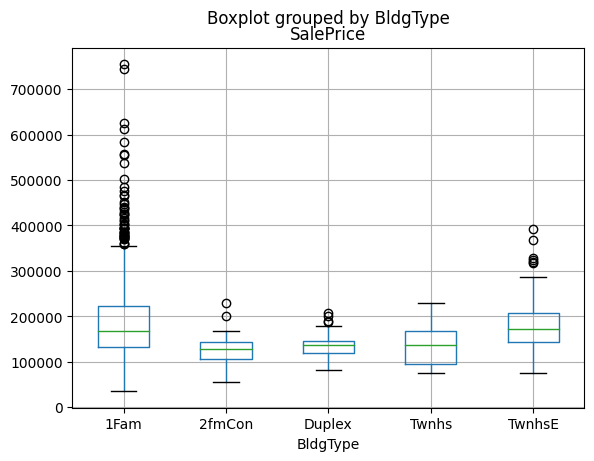

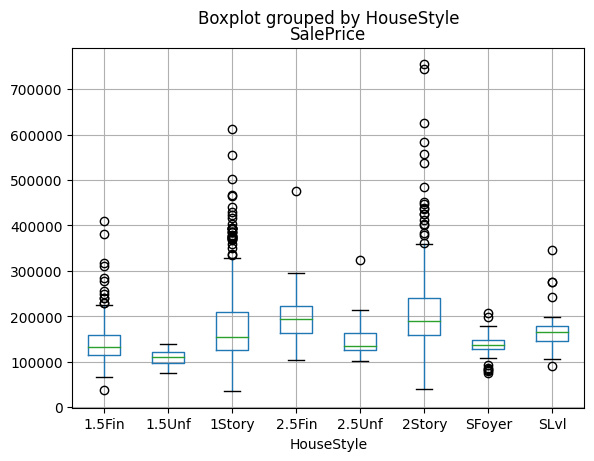

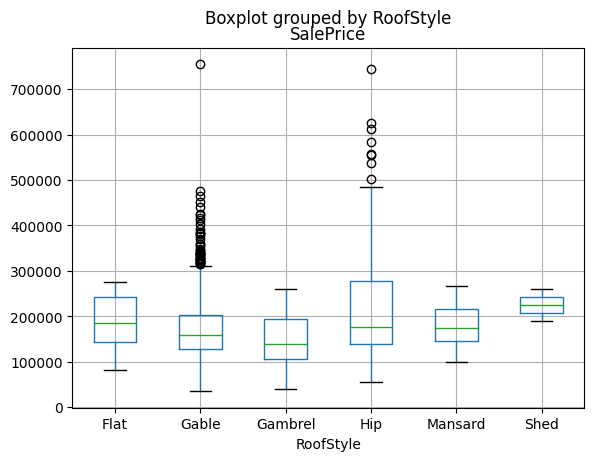

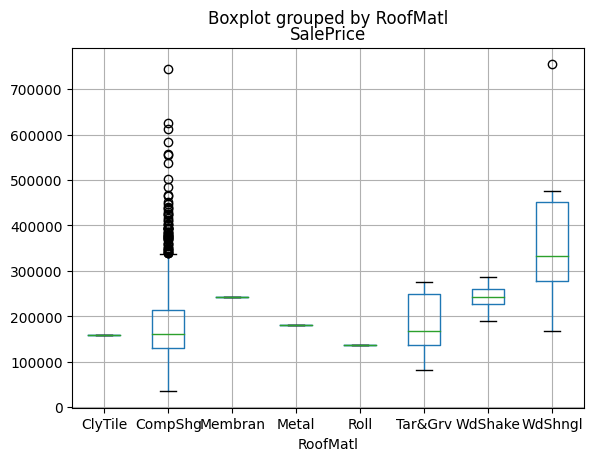

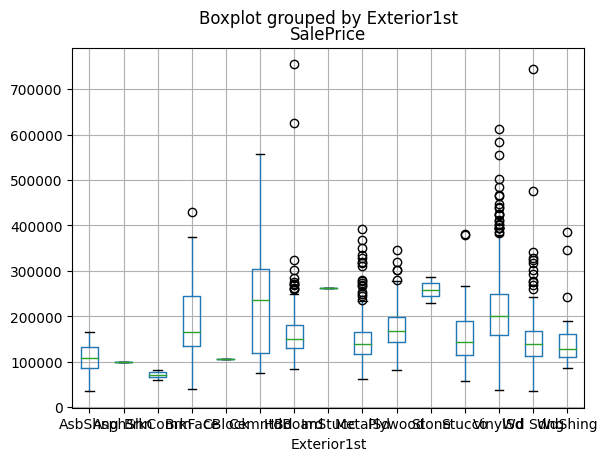

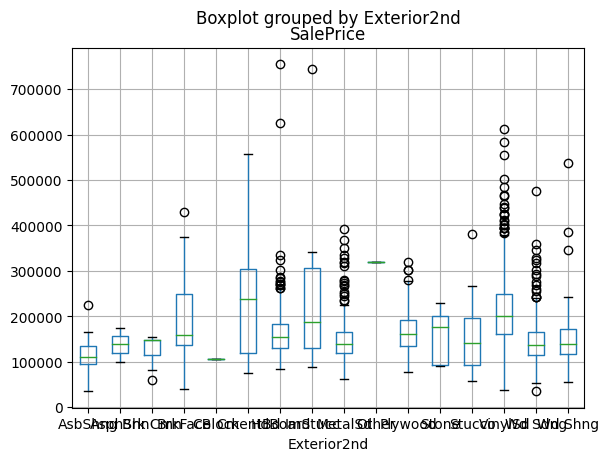

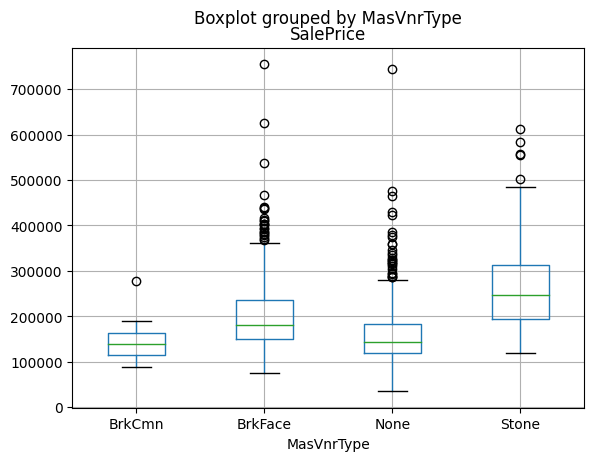

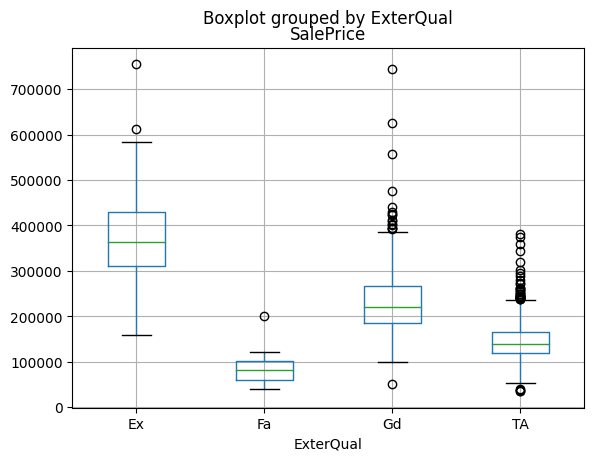

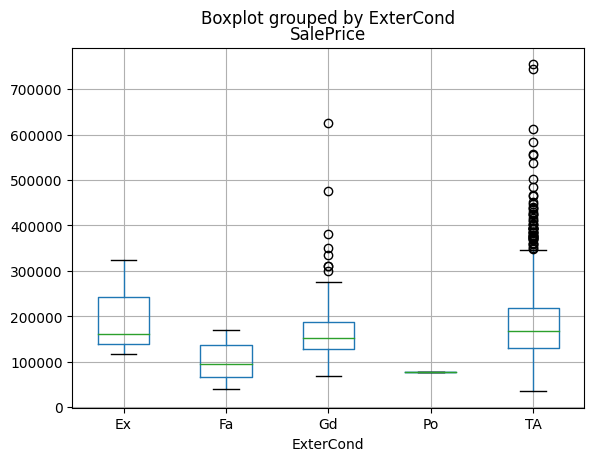

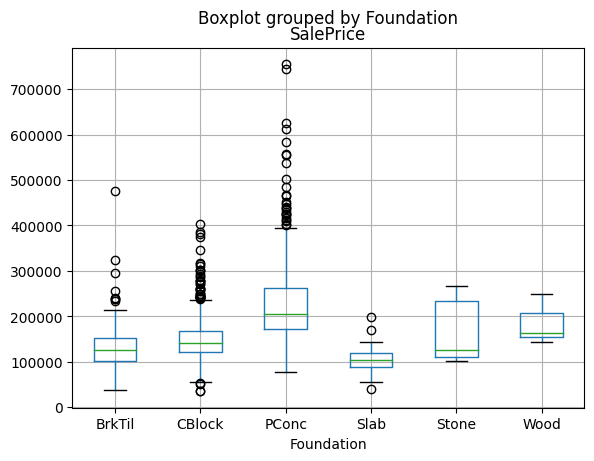

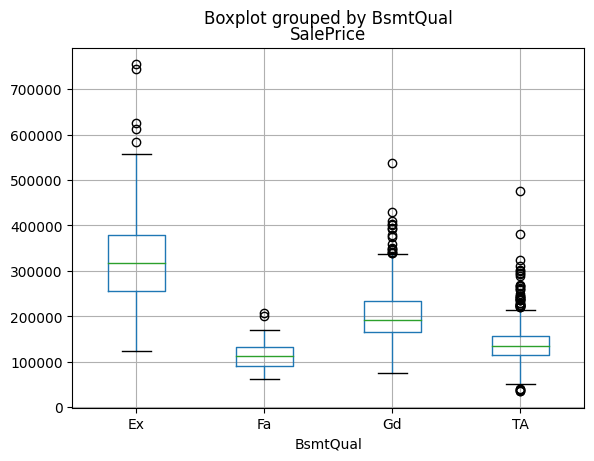

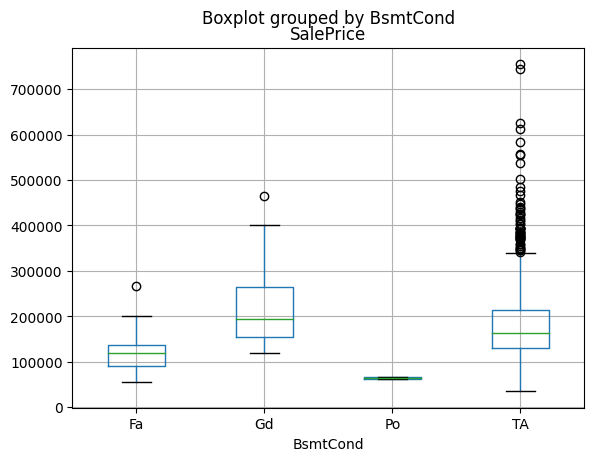

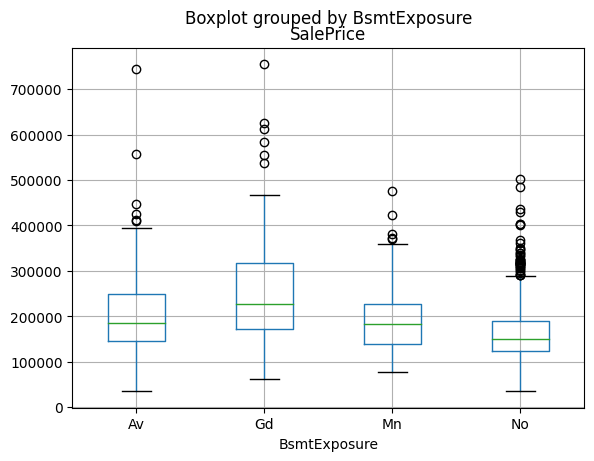

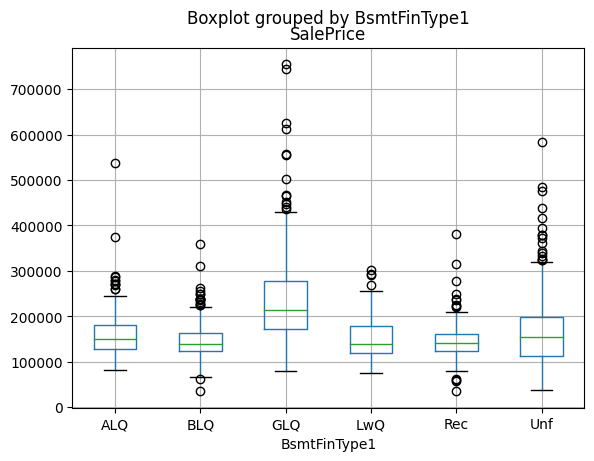

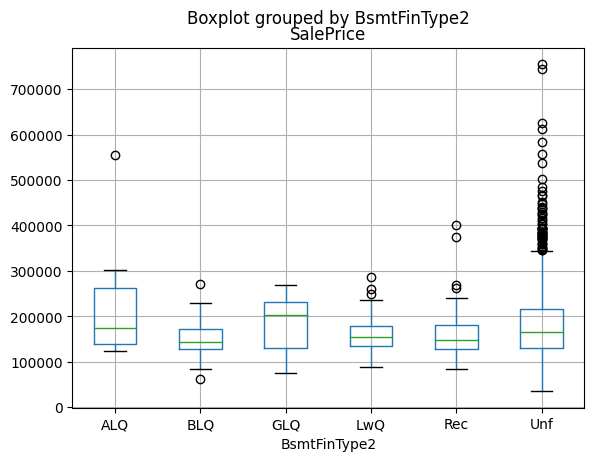

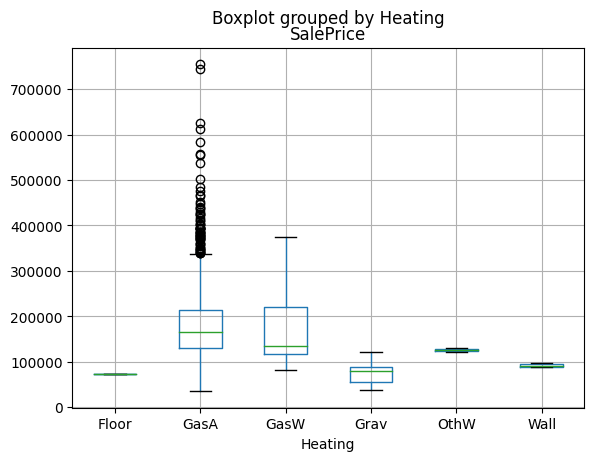

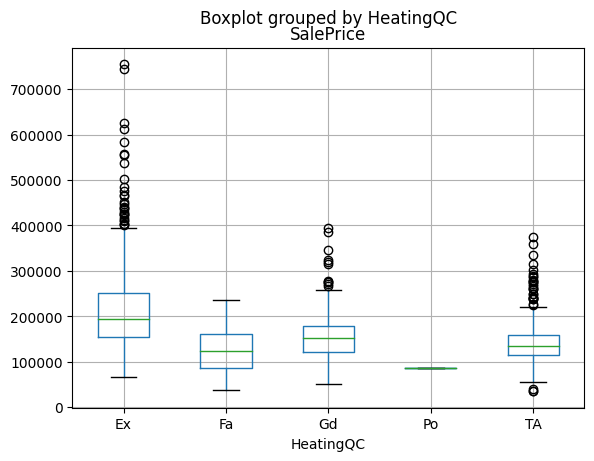

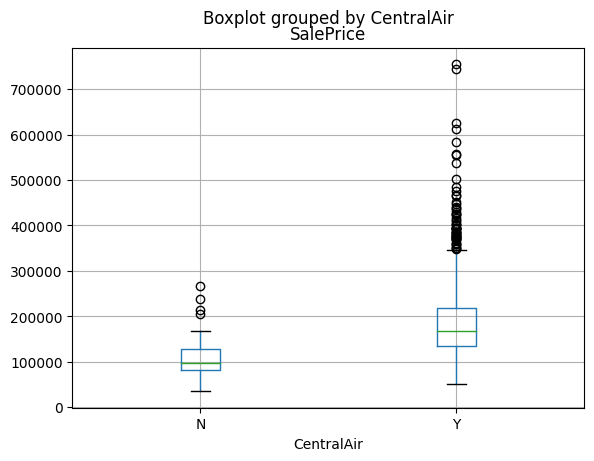

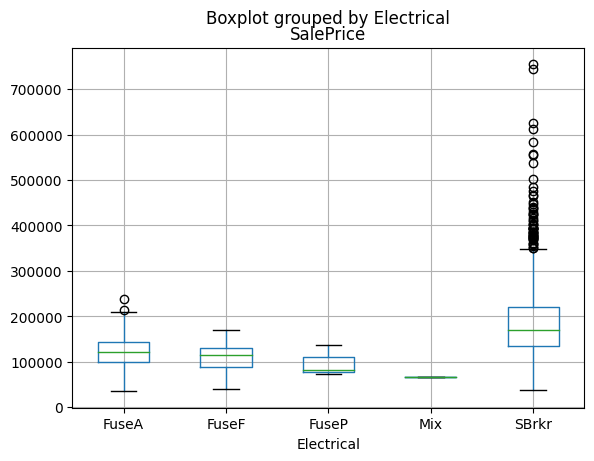

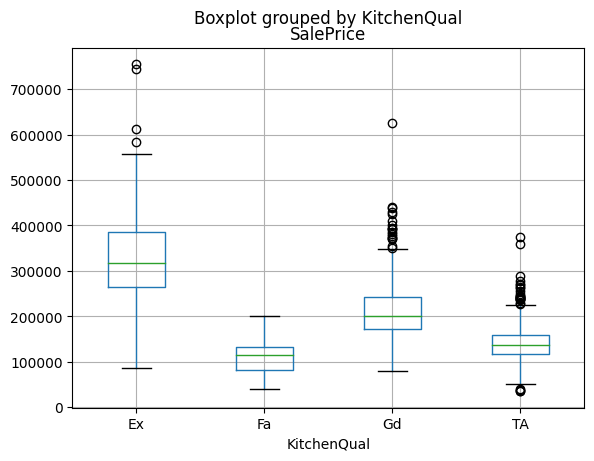

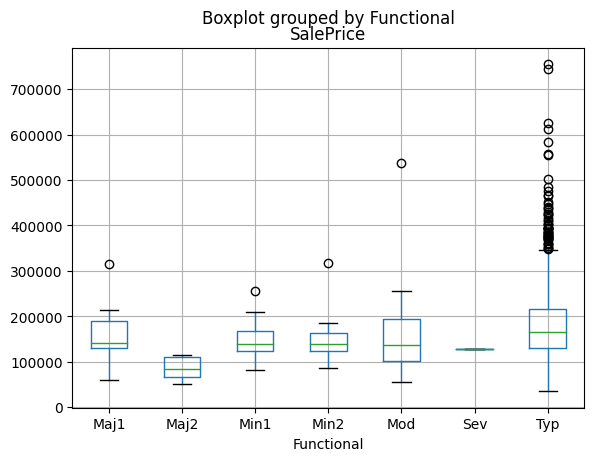

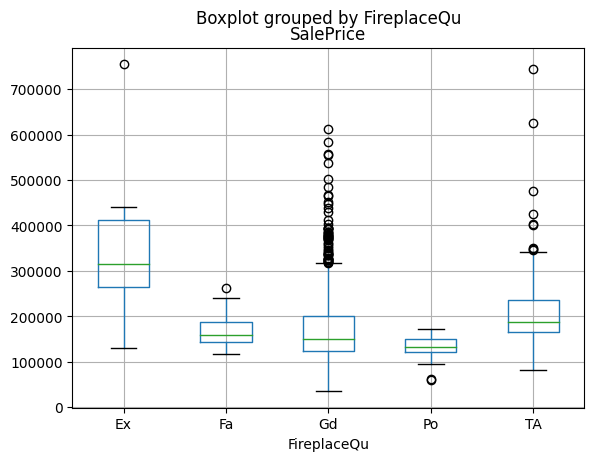

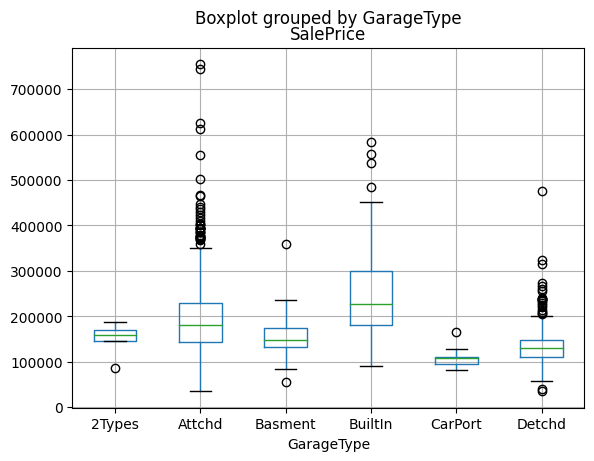

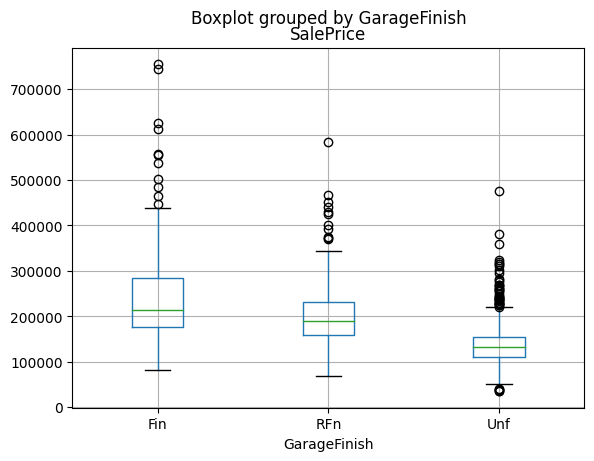

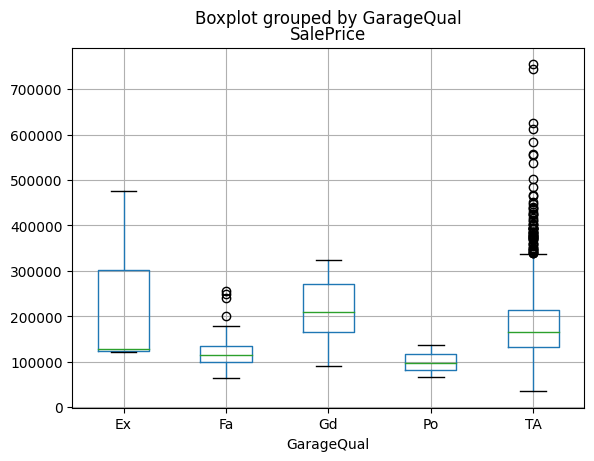

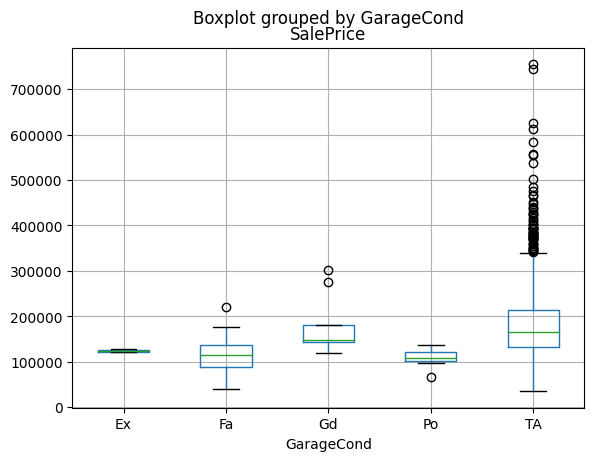

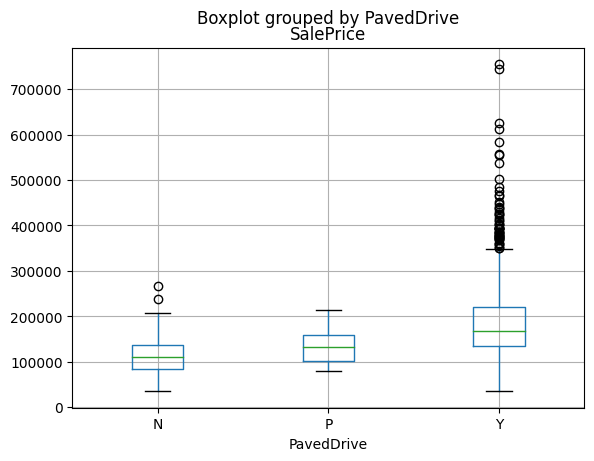

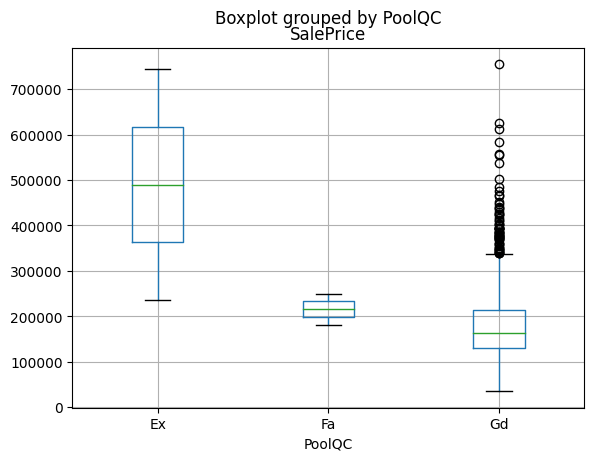

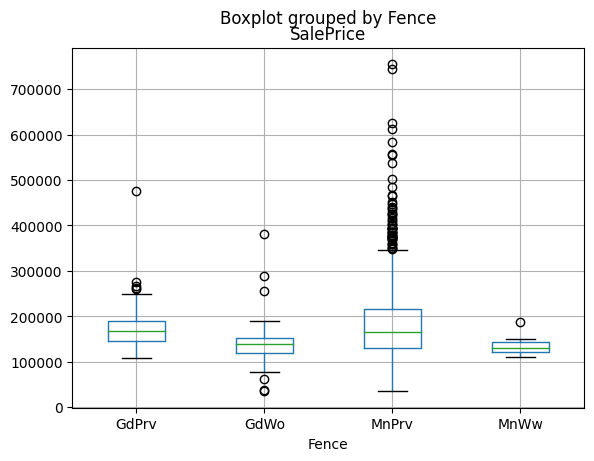

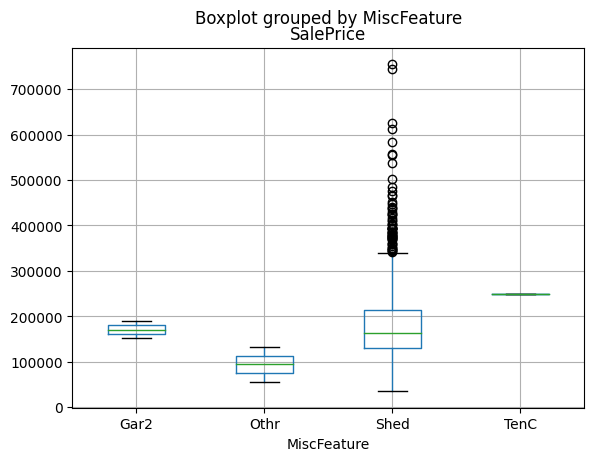

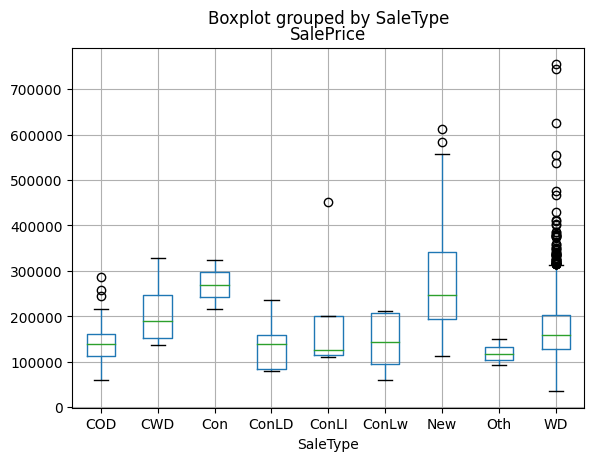

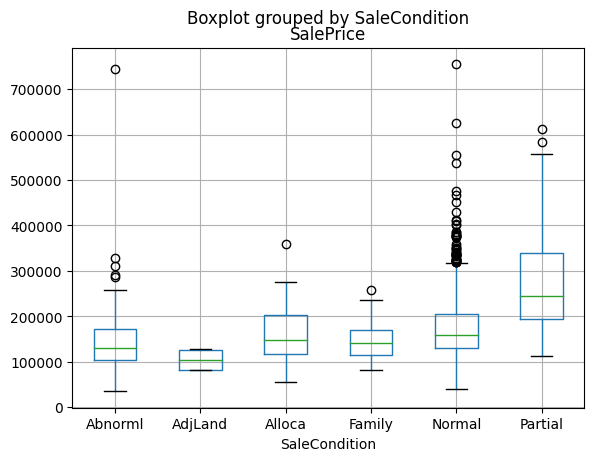

In [28]:
for i in x_train.columns:
    if i in textCol:
        x_train.boxplot("SalePrice", by=i)